# Visualização de dados

com seaborn  
https://seaborn.pydata.org/

O Seaborn é uma biblioteca que utiliza o matplotlib mas provê uma interface um pouco mais "amigável"/ de "alto nível".

"Catálogo de gráficos" em python:  
https://python-graph-gallery.com/

Cheat sheets úteis:  
https://python-graph-gallery.com/cheat-sheets/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def example_plot():
    fig, ax = plt.subplots(2, 2, figsize=(15, 8))

    ax[0,0].scatter(np.arange(10), np.random.random(10), c=np.random.choice([0, 3, 7], 10), s=np.random.choice([50, 100, 150], 10))
    ax[0,1].plot(np.arange(10), np.random.random(10))
    ax[0,1].plot(np.arange(10), np.random.random(10))
    ax[0,1].plot(np.arange(10), np.random.random(10))
    ax[1,0].bar(np.arange(10), np.random.random(10))
    ax[1,1].pie(np.random.random(10), np.full(10, 0.1))
    plt.show()

## Algumas opções estéticas

http://seaborn.pydata.org/tutorial/color_palettes.html

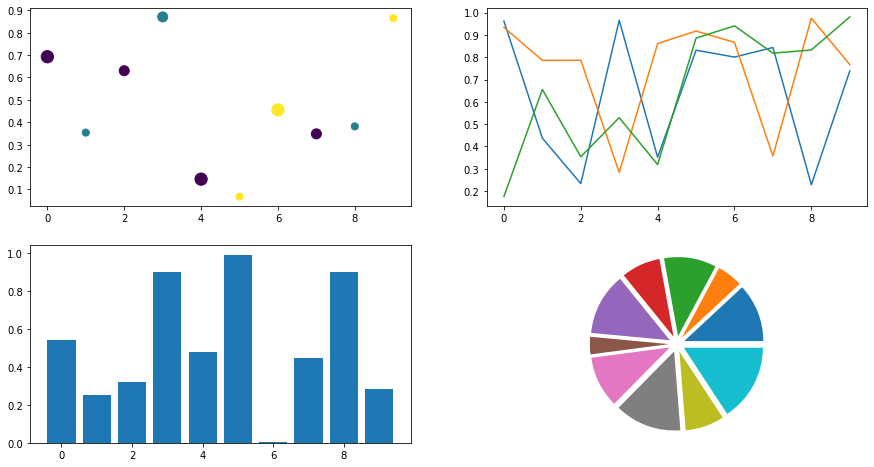

In [3]:
sns.reset_orig() # voltar para o estilo do matplotlib
example_plot()

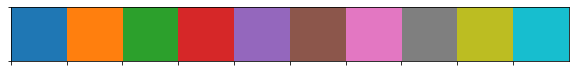

In [4]:
sns.palplot(sns.color_palette())

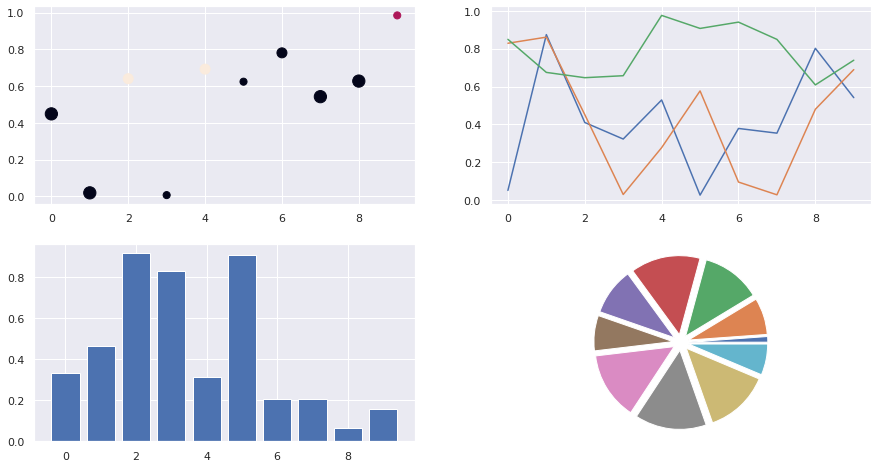

In [5]:
sns.set() # setar estilo default do seaborn
example_plot()

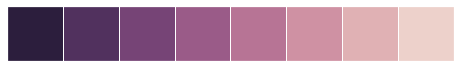

In [6]:
sns.palplot(sns.cubehelix_palette(8, reverse=True))

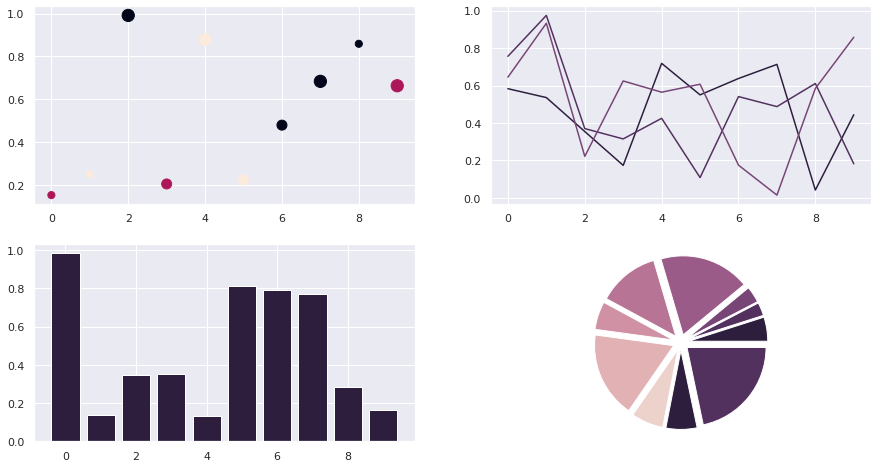

In [7]:
with sns.cubehelix_palette(8, reverse=True):
    example_plot()

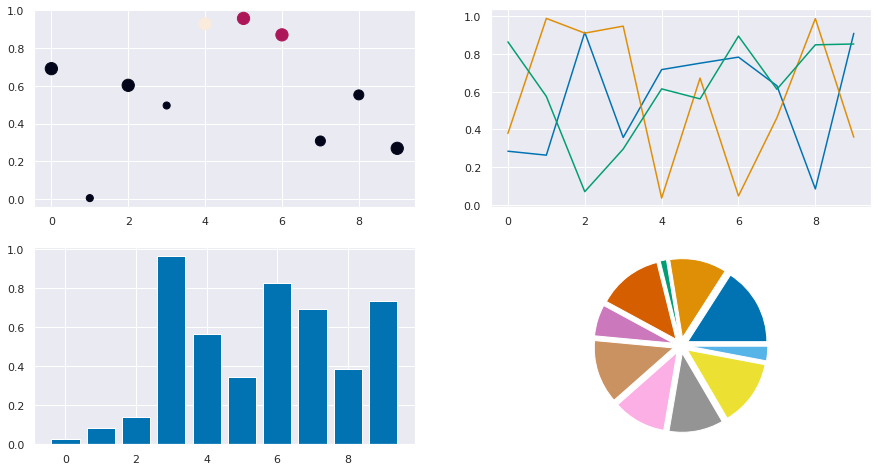

In [8]:
with sns.color_palette('colorblind'):
    example_plot()

In [9]:
#sns.set_style("whitegrid") # <= mudar o estilo
# outras opções: https://seaborn.pydata.org/tutorial/aesthetics.html#seaborn-figure-styles)

## Visualizar relações lineares

In [10]:
colnames = ['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Stage', 'Legendary']
df = pd.read_csv('../dados/misc/pokemon_gen1.csv', header=None, names=colnames)
df

#        Name   Type 1  Type 2  Total   HP  Attack  Defense  Sp. Atk  \
0      1   Bulbasaur    Grass  Poison    318   45      49       49       65   
1      2     Ivysaur    Grass  Poison    405   60      62       63       80   
2      3    Venusaur    Grass  Poison    525   80      82       83      100   
3      4  Charmander     Fire     NaN    309   39      52       43       60   
4      5  Charmeleon     Fire     NaN    405   58      64       58       80   
..   ...         ...      ...     ...    ...  ...     ...      ...      ...   
146  147     Dratini   Dragon     NaN    300   41      64       45       50   
147  148   Dragonair   Dragon     NaN    420   61      84       65       70   
148  149   Dragonite   Dragon  Flying    600   91     134       95      100   
149  150      Mewtwo  Psychic     NaN    680  106     110       90      154   
150  151         Mew  Psychic     NaN    600  100     100      100      100   

     Sp. Def  Speed  Stage  Legendary  
0         65     45      1      False  
1         80     60      2      False  
2        100     80      3      False  
3         50     65      1      False  
4         65     80      2      False  
..       ...    ...    ...        ...  
146       50     50      1      False  
147       70     70      2      False  
148      100     80      3      False  
149       90    130      1       True  
150      100    100      1      False  

[151 rows x 13 columns]

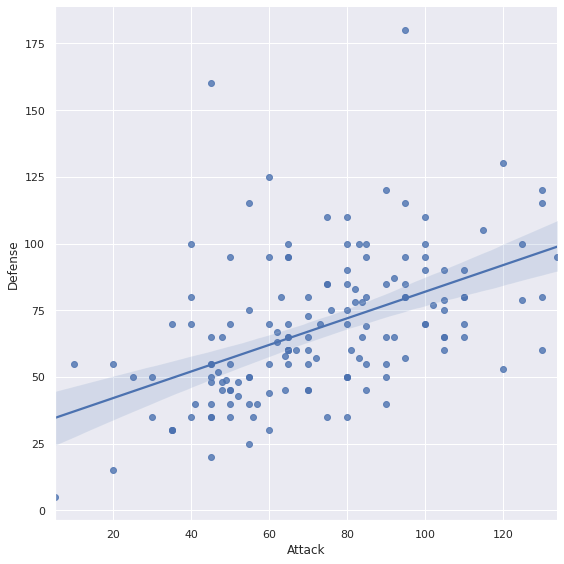

In [11]:
sns.lmplot(x='Attack', y='Defense', data=df, height=8)

O retorno da função `sns.lmplot` é um objeto do tipo `FacetGrid`.  
Podemos consultar a [documentação](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) dessa classe para ver quais métodos e atributos estão disponíveis

Text(0.5, 1.0, 'Pokemons')

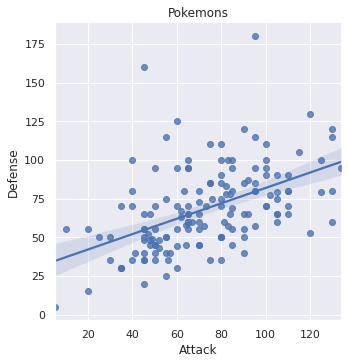

In [12]:
fg = sns.lmplot(x='Attack', y='Defense', data=df, height=5)
fg.ax.set_title('Pokemons')
#plt.show()

In [13]:
type(fg), type(fg.axes[0,0]), type(fg.ax)

(seaborn.axisgrid.FacetGrid,
 matplotlib.axes._subplots.AxesSubplot,
 matplotlib.axes._subplots.AxesSubplot)

#### Podemos utilizar também as funções de formatação do `matplotlib.pyplot`.

Text(0.5, 1.0, 'pokemons outra vez')

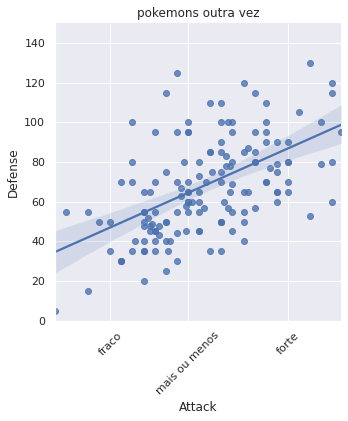

In [14]:
sns.lmplot(x='Attack', y='Defense', data=df, height=5)
plt.xticks(rotation=45)
plt.ylim(0, 150)
plt.xticks(ticks = [30, 65, 110], labels = ['fraco', 'mais ou menos', 'forte'])
plt.title('pokemons outra vez')

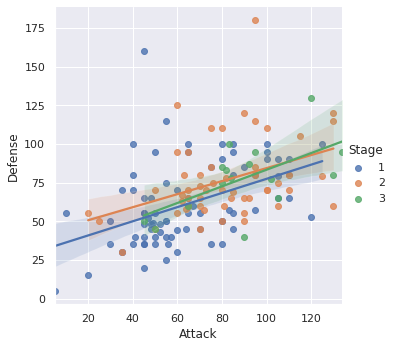

In [16]:
sns.lmplot(
    x='Attack', y='Defense', data=df,
    #fit_reg=False, # sem regressão
    fit_reg=True,
    hue='Stage'    # cores para cada evolução
)

## Box, Violin e Swarmplot

In [18]:
df.head(2)

#       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   

   Speed  Stage  Legendary  
0     45      1      False  
1     60      2      False

In [19]:
df.describe()

#      Total          HP      Attack     Defense     Sp. Atk  \
count  151.000000  151.00000  151.000000  151.000000  151.000000  151.000000   
mean    76.000000  407.07947   64.211921   72.549669   68.225166   67.139073   
std     43.734045   99.74384   28.590117   26.596162   26.916704   28.534199   
min      1.000000  195.00000   10.000000    5.000000    5.000000   15.000000   
25%     38.500000  320.00000   45.000000   51.000000   50.000000   45.000000   
50%     76.000000  405.00000   60.000000   70.000000   65.000000   65.000000   
75%    113.500000  490.00000   80.000000   90.000000   84.000000   87.500000   
max    151.000000  680.00000  250.000000  134.000000  180.000000  154.000000   

          Sp. Def       Speed       Stage  
count  151.000000  151.000000  151.000000  
mean    66.019868   68.933775    1.582781  
std     24.197926   26.746880    0.676832  
min     20.000000   15.000000    1.000000  
25%     49.000000   46.500000    1.000000  
50%     65.000000   70.000000    1.000000  
75%     80.000000   90.000000    2.000000  
max    125.000000  140.000000    3.000000

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

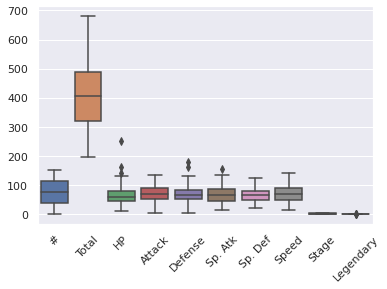

In [17]:
sns.boxplot(data=df)
plt.xticks(rotation=45)

<class 'matplotlib.axes._subplots.AxesSubplot'>


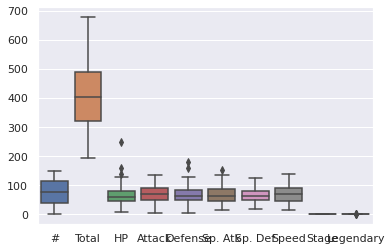

In [17]:
ret = sns.boxplot(data=df)
print(type(ret))

In [20]:
df[['HP', 'Attack', 'Defense', 'Speed']].head(3)

HP  Attack  Defense  Speed
0  45      49       49     45
1  60      62       63     60
2  80      82       83     80

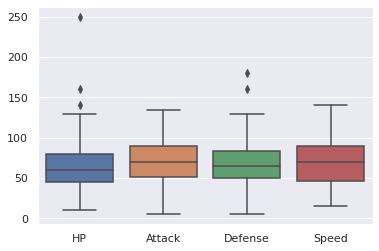

In [18]:
# selecionar as colunas de interesse => faz um box para cada coluna
sns.boxplot(data=df[['HP', 'Attack', 'Defense', 'Speed']])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

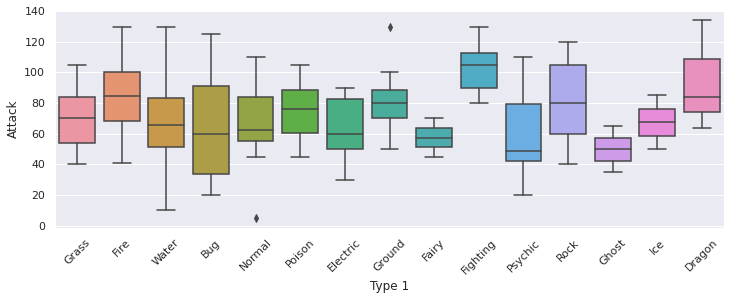

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(
    x='Type 1',
    y='Attack', # <= aqui estamos escolhendo uma coluna específica (também funciona com o boxplot)
    data=df
)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

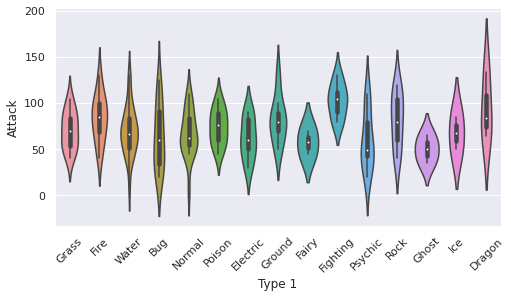

In [27]:
plt.figure(figsize=(8, 4))
sns.violinplot(
    x='Type 1',
    y='Attack', # <= aqui estamos escolhendo uma coluna específica (também funciona com o boxplot)
    data=df
)
plt.xticks(rotation=45)
#plt.tight_layout()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

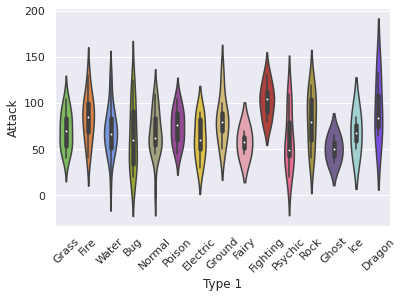

In [20]:
### Definindo paleta de cores (RGB)

pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

# Violin plot with Pokemon color palette
sns.violinplot(
    x='Type 1', y='Attack', data=df, 
    palette=pkmn_type_colors) # Set color palette
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

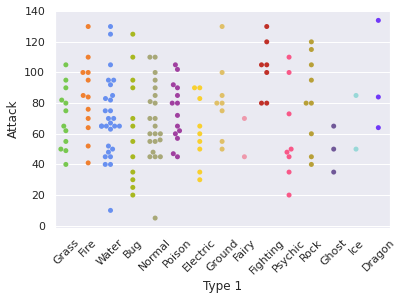

In [21]:
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

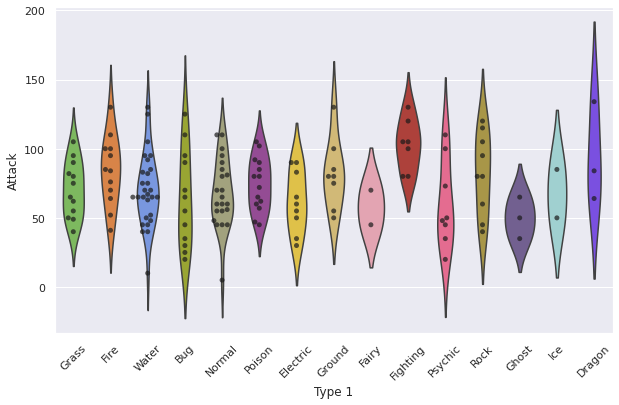

In [22]:
### Podemos combinar gráficos:

plt.figure(figsize=(10, 6))
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df,
              #height=7,
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
plt.xticks(rotation=45)

In [28]:
## Separando algumas variaveis de interesse
stats_df = df.drop(['#', 'Total', 'Stage', 'Legendary'], axis=1)
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0   Bulbasaur  Grass  Poison  45      49       49       65       65     45
1     Ivysaur  Grass  Poison  60      62       63       80       80     60
2    Venusaur  Grass  Poison  80      82       83      100      100     80
3  Charmander   Fire     NaN  39      52       43       60       50     65
4  Charmeleon   Fire     NaN  58      64       58       80       65     80

In [29]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

Name Type 1  Type 2 Stat  value
0   Bulbasaur  Grass  Poison   HP     45
1     Ivysaur  Grass  Poison   HP     60
2    Venusaur  Grass  Poison   HP     80
3  Charmander   Fire     NaN   HP     39
4  Charmeleon   Fire     NaN   HP     58

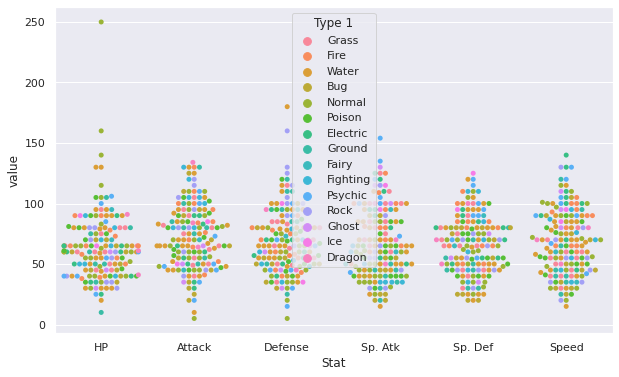

In [25]:
plt.figure(figsize=(10, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')
#plt.legend(
#    loc='upper center', bbox_to_anchor=(0.5, 1.1),
#    ncol=3, shadow=True
#)

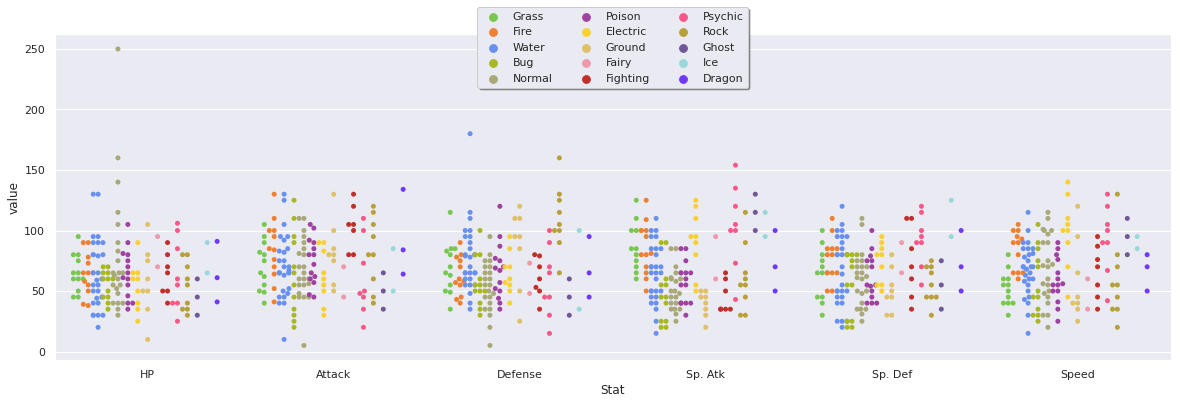

In [26]:
plt.figure(figsize=(20, 6))
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1',
              dodge=True,               # Separate points by hue
              palette=pkmn_type_colors) # Use Pokemon palette
plt.legend(
    loc='upper center', bbox_to_anchor=(0.5, 1.1),
    ncol=3, shadow=True
)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

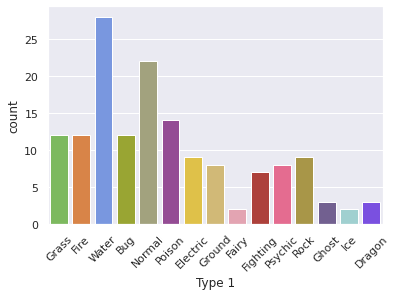

In [27]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=45)

## Heatmap

In [31]:
stats_df.head()

Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed
0   Bulbasaur  Grass  Poison  45      49       49       65       65     45
1     Ivysaur  Grass  Poison  60      62       63       80       80     60
2    Venusaur  Grass  Poison  80      82       83      100      100     80
3  Charmander   Fire     NaN  39      52       43       60       50     65
4  Charmeleon   Fire     NaN  58      64       58       80       65     80

In [33]:
# método de dataframe para calcular matriz de correlações
corr = stats_df.corr()
corr

HP    Attack   Defense   Sp. Atk   Sp. Def     Speed
HP       1.000000  0.306768  0.119782  0.236649  0.490978 -0.040939
Attack   0.306768  1.000000  0.491965  0.146312  0.369069  0.194701
Defense  0.119782  0.491965  1.000000  0.187569  0.139912 -0.053252
Sp. Atk  0.236649  0.146312  0.187569  1.000000  0.522907  0.411516
Sp. Def  0.490978  0.369069  0.139912  0.522907  1.000000  0.392656
Speed   -0.040939  0.194701 -0.053252  0.411516  0.392656  1.000000

In [34]:
corr.values

array([[ 1.        ,  0.30676829,  0.11978224,  0.23664859,  0.49097792,
        -0.04093895],
       [ 0.30676829,  1.        ,  0.49196546,  0.14631223,  0.36906882,
         0.19470094],
       [ 0.11978224,  0.49196546,  1.        ,  0.1875691 ,  0.13991226,
        -0.05325227],
       [ 0.23664859,  0.14631223,  0.1875691 ,  1.        ,  0.52290668,
         0.41151591],
       [ 0.49097792,  0.36906882,  0.13991226,  0.52290668,  1.        ,
         0.39265636],
       [-0.04093895,  0.19470094, -0.05325227,  0.41151591,  0.39265636,
         1.        ]])

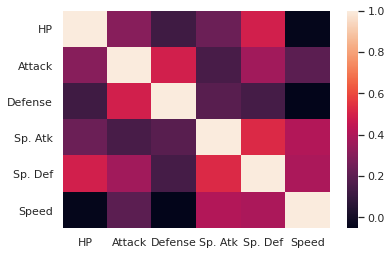

In [36]:
# pode ser com um dataframe ou uma matriz
sns.heatmap(corr)

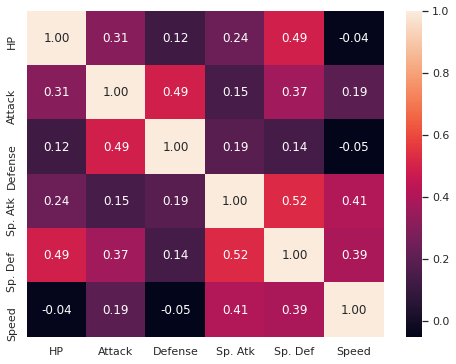

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f')

## Distribuições

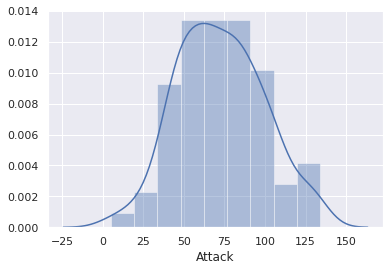

In [39]:
sns.distplot(df.Attack)

Podemos compor o subplot da mesma maneira que fazíamos no matplotlib  

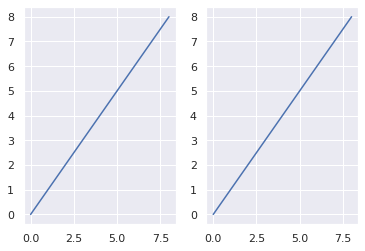

In [41]:
plt.subplot(121)
plt.plot(np.arange(9))

plt.subplot(122)
plt.plot(np.arange(9))

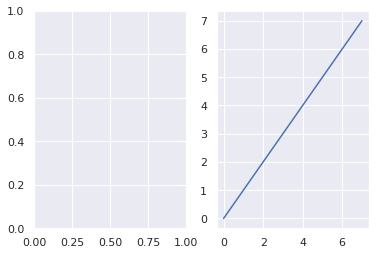

In [44]:
fig, ax = plt.subplots(1, 2)

ax[1].plot(np.arange(8))

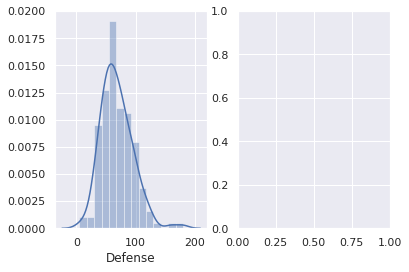

In [49]:
plt.subplot(121)
sns.distplot(df.Defense, label='Defense')

plt.subplot(122)
#plt.show()

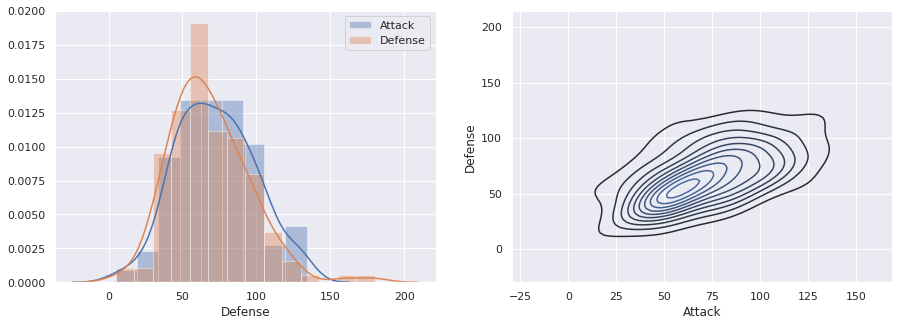

In [40]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.distplot(df.Attack, label='Attack', ax=ax[0])
sns.distplot(df.Defense, label='Defense', ax=ax[0])
ax[0].legend()

sns.kdeplot(df.Attack, df.Defense, ax=ax[1])


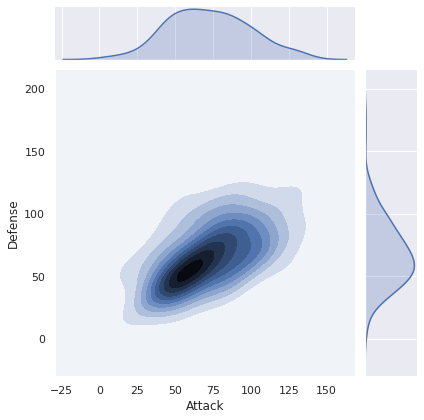

In [33]:
sns.jointplot('Attack', 'Defense', stats_df, kind='kde')

## Outras Maneiras de fazer "Multi-plots"

### Pairplot

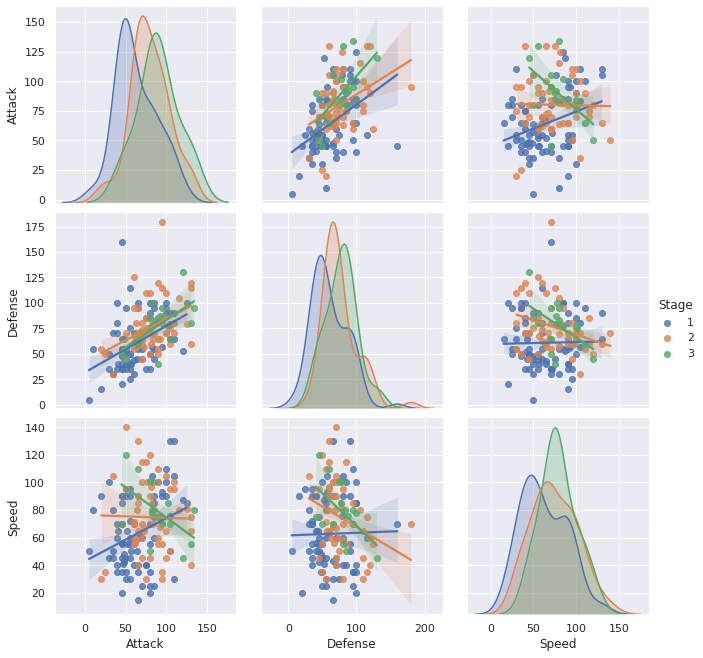

In [52]:
sns.pairplot(
    #df.select_dtypes(include=[float, int]),
    df, vars=['Attack', 'Defense', 'Speed'],
    hue='Stage',
    kind='reg',
    height=3
)

### Catplot  

Com o catplot podemos fazer multiplots estruturados de box, violin, swarm entre outros

https://seaborn.pydata.org/api.html#categorical-plots

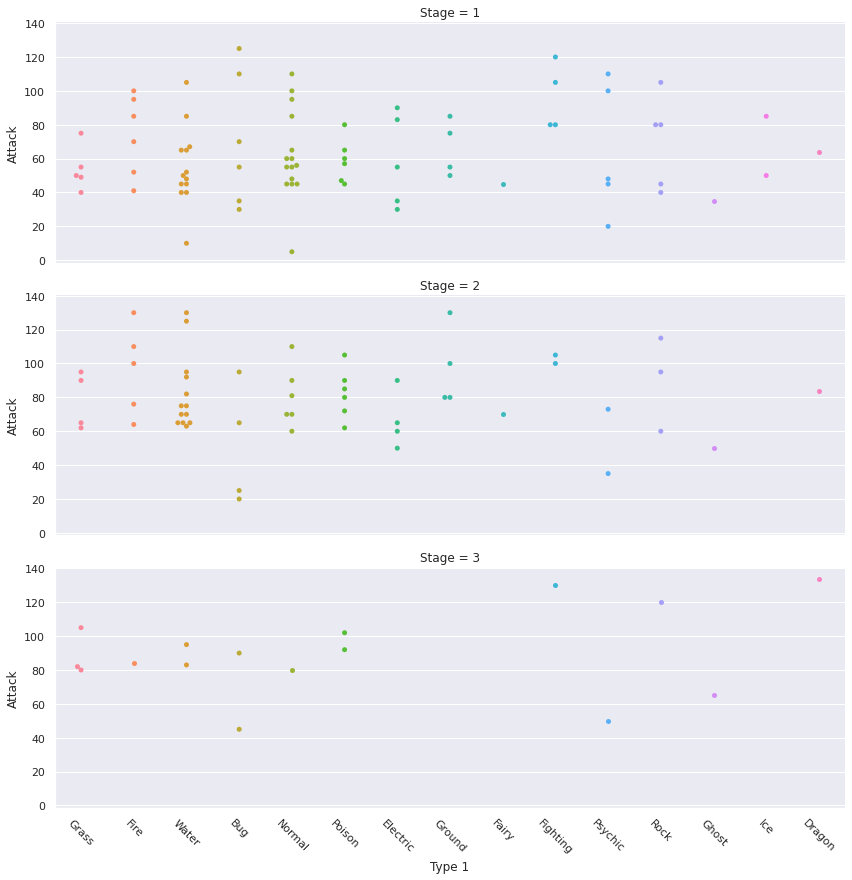

In [56]:
sns.set() 
#sns.set_style("darkgrid")
g = sns.catplot(
    x='Type 1', 
    y='Attack', 
    data=df, 
    hue='Type 1',
    kind='swarm',   # tipo de grafico (veja o link acima para mais tipos)
    row='Stage',    # Em cada linha, um estágio de evolução
    #col='Stage',   # Em cada coluna, um estágio de evolução
    height=4,   # definir altura do subgráfico
    aspect=3.0  # aspect idica a proporção da largura em relação a height
)
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

In [36]:
print(type(g))

<class 'seaborn.axisgrid.FacetGrid'>


### FacetGrid  

É uma maneira ainda mais geral que o catplot

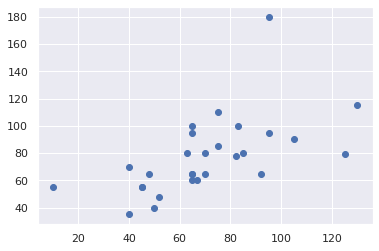

In [37]:
# por exemplo, se queremos fazer um gráfico assim para cada tipo de pokemon
plt.scatter(
    'Attack',
    'Defense',
    data = df[df['Type 1'] == 'Water']
)

<Figure size 576x432 with 0 Axes>

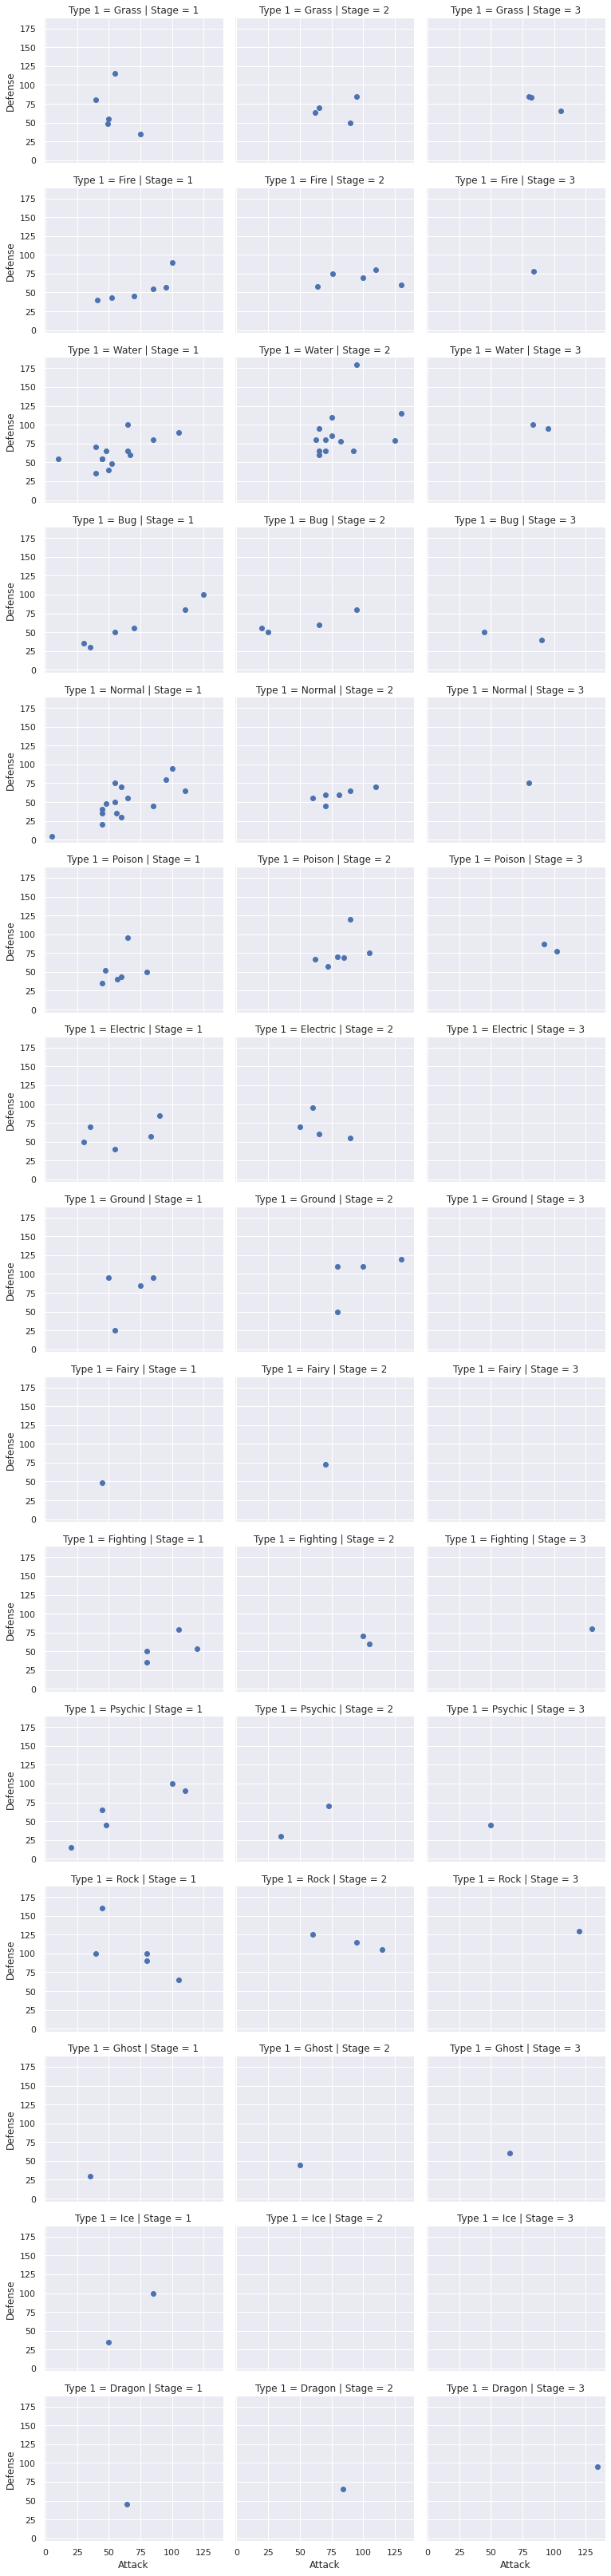

In [58]:
plt.figure(figsize=(8, 6))
# define um grid passando categóricas row em col que serão usadas para particionar o dataset
g = sns.FacetGrid(df, row="Type 1", col="Stage", height=3, aspect=1.2)
# aplica uma função que gera um gráfico para cada subgrupo
# note que não precisa ser uma função seaborn, pode ser do puplot também

g.map(
    plt.scatter,
    'Attack', # parametro x passado para plt.scatter
    'Defense' # parametro y passado para plt.scatter
)
#g.set_xticklabels(rotation=-45)

## Exercícios

Utilizando `melted_df` e a função `sns.boxplot`, replique o gráfico abaixo

![](./boxplot_ast.png)

Veja o `countplot` que fizemos anteriormente (lá em cima).  
Faça um código para exibir esse gráfico ordenando as barras da maior para a menor.  
Certifique-se de que as cores da paleta de tipos sejam exibidas corretamente.  
O resultado final deve ficar mais ou menos assim:

![](./countplot_sorted.png)